In [127]:
# Usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay

In [157]:
# import dataset in Colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


In [166]:
# Loading dataset and doing Analysis
df= pd.read_csv("data.csv")
print(df.head())
print('-'*40)
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

ValueError: could not convert string to float: 'M'

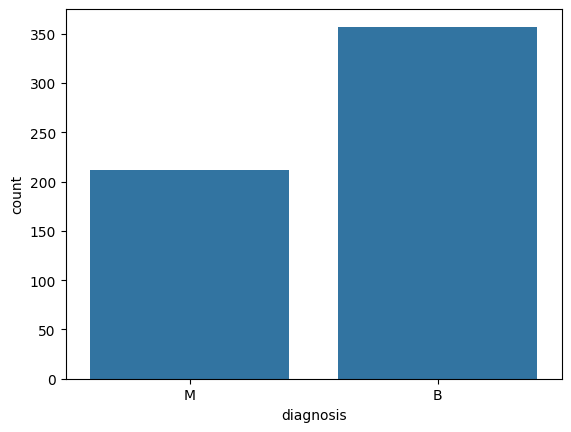

In [167]:
# Data Visualization
sns.countplot(x="diagnosis",data=df)
plt.Figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True)

In [168]:
# Data preperation and preprocessing
df=df.drop(["Unnamed: 32",'id'],axis=1)
df["diagnosis"]=df["diagnosis"].apply(lambda x:1 if x=="M" else 0)

In [169]:
# Preparing for Training
train_df=df.drop(["diagnosis"],axis=1)
y=df['diagnosis']
x=train_df
x=pd.DataFrame(x)
print(x.head())
print(y.shape)


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [170]:
# Training of Models     :: We going to use Logistic, Random Forest , Gradient Boost here
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)
scale=StandardScaler() # Scaling Features
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)
#------------Random forest-------------------------
rf_model=RandomForestClassifier(
    n_estimators=500,
    max_depth=4,
    random_state=42
)
rf_model.fit(x_train,y_train)
#----------------Gradient Boosting-----------------
gb_model=GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=6,
    random_state=42
)
gb_model.fit(x_train,y_train)
#---------------------Logistic Regression------------
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [171]:
# Predicting model accuracy---------
y_pred=lg_model.predict(x_test)
rf_pred=rf_model.predict(x_test)
gb_pred=gb_model.predict(x_test)
score_lg=accuracy_score(y_test,y_pred)
score_rf=accuracy_score(y_test,rf_pred)
score_gb=accuracy_score(y_test,gb_pred)
print("Logistic regression accurancy",score_lg*100)
print("Random forest accurancy",score_rf*100)
print("Gradient bossting accurancy",score_gb*100)

Logistic regression accurancy 96.49122807017544
Random forest accurancy 96.27192982456141
Gradient bossting accurancy 90.13157894736842


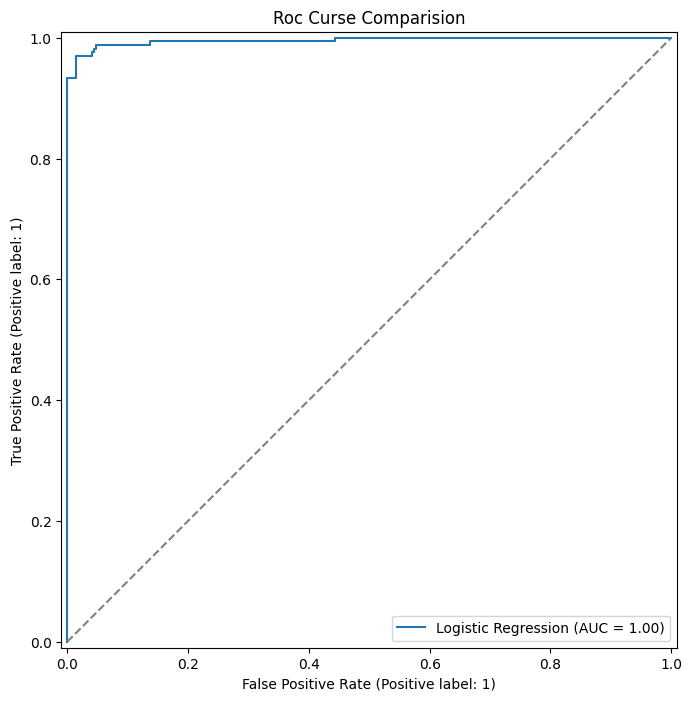

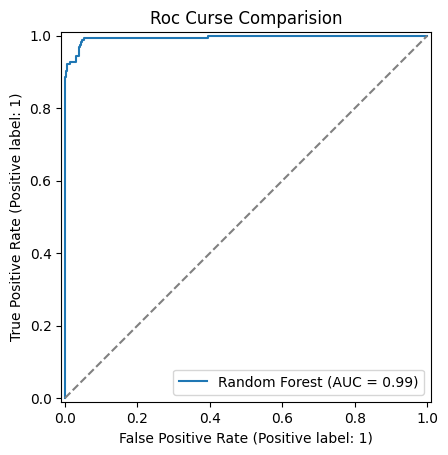

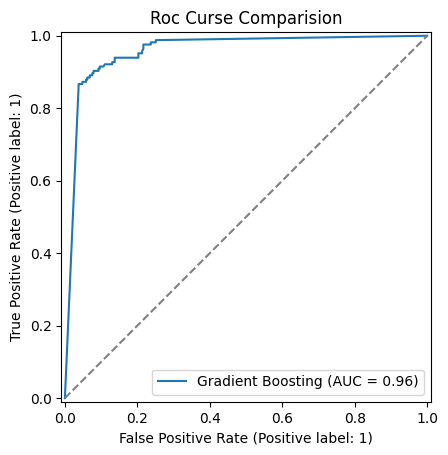

In [172]:
#  ROC & AUC Comparison ------------
models={
    'Logistic Regression':lg_model,
    'Random Forest':rf_model,
    'Gradient Boosting':gb_model
}
plt.figure(figsize=(10,8))
for name,clf in models.items():
  RocCurveDisplay.from_estimator(clf,x_test,y_test,name=name,ax=plt.gca())
  plt.plot([0,1],[0,1],"--",color='gray')
  plt.title("Roc Curse Comparision")
  plt.show()